In [2]:
import numpy as np
import cv2
import myUtil as utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

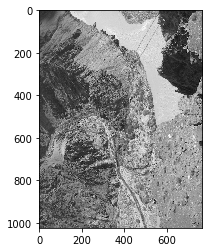

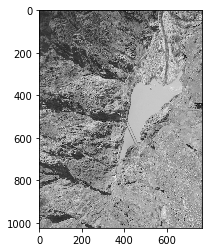

(<Figure size 432x288 with 1 Axes>,
 None)

In [3]:
river1=utils.readRaw("HW4_Images/river1.raw",1024,768,3).astype('uint8')
river2=utils.readRaw("HW4_Images/river2.raw",1024,768,3).astype('uint8')

r1_gray=cv2.cvtColor(river1,cv2.COLOR_RGB2GRAY)
r2_gray=cv2.cvtColor(river2,cv2.COLOR_RGB2GRAY)

plt.figure(),plt.imshow(r1_gray,cmap='gray'),plt.show()
plt.figure(),plt.imshow(r2_gray,cmap='gray'),plt.show()

In [4]:
sift=cv2.xfeatures2d.SIFT_create()
kps_r1,des_r1=sift.detectAndCompute(r1_gray,None)
kps_r2,des_r2=sift.detectAndCompute(r2_gray,None)
print(len(kps_r1),len(des_r1))

8861 8861


In [5]:
max_i=None
for i in range(len(kps_r1)):
    if max_i==None:
        max_i=i
    elif kps_r1[max_i].size<kps_r1[i].size:
        max_i=i

print(kps_r1[max_i].size)
print(kps_r2[5152].size)
print(max_i)
kps_r1_max=np.array([kps_r1[max_i]])
des_r1_max=np.array([des_r1[max_i]])

138.1913299560547
2.27630352973938
4420


In [6]:
#r1_kps_img=cv2.drawKeypoints(river1,np.array([kps_r1[max_i]]),None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
r1_kps_img=cv2.drawKeypoints(river1,kps_r1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#r2_kps_img=cv2.drawKeypoints(river2,np.array([kps_r2[5152]]),None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
r2_kps_img=cv2.drawKeypoints(river2,kps_r2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
mpimg.imsave("r1_kps.png",arr=r1_kps_img)
mpimg.imsave("r2_kps.png",arr=r2_kps_img)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.match(des_r1_max, des_r2)
print(matches)

[<DMatch 000001C622E8C150>]


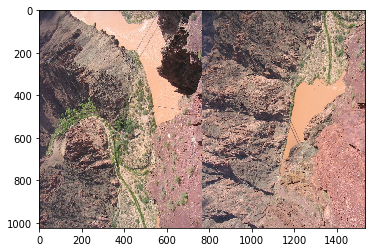

In [8]:

out=cv2.drawMatches(river1,kps_r1_max,river2,kps_r2,matches,None,flags=2)
plt.imshow(out)
mpimg.imsave("out.png",arr=out)

In [9]:
print(kps_r1_max[matches[0].queryIdx].angle)
print(kps_r2[matches[0].trainIdx].angle)

312.5960693359375
225.32183837890625
